In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, roc_curve, auc
import os
import sys
from tabulate import tabulate

In [96]:
def calculate_metrics(pred_prob, GT):
    fpr, tpr, thresholds = roc_curve(GT, pred_prob)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    pred_labels = (pred_prob >= optimal_threshold).astype(int)
    #print("prediction: ", pred_labels)
    #print("GT: ", GT)

    # Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
    TP = ((pred_labels == 1) & (GT == 1)).sum()
    TN = ((pred_labels == 0) & (GT == 0)).sum()
    FP = ((pred_labels == 1) & (GT == 0)).sum()
    FN = ((pred_labels == 0) & (GT == 1)).sum()
    sensitivity = TP / (TP + FN)
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    auc_score = auc(fpr, tpr)

    results = [
        ["True Positives (TP)", TP],
        ["True Negatives (TN)", TN],
        ["False Positives (FP)", FP],
        ["False Negatives (FN)", FN],
        ["Sensitivity", sensitivity],
        ["Precision", precision],
        ["Specificity", specificity],
        ["AUC", auc_score]
    ]
    # Print results in tabular form
    print(tabulate(results, headers=["Metric", "Value"], tablefmt="fancy_grid"))

    return auc

In [97]:
data = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_7/Metrics/epoch_648.csv")
data

,Unnamed: 0,unique_patient_ID_scan_date,GT,prediction (age)
0,0,npr692854135687_20130523,62.0,61.899517
1,1,npr692854135687_20131009,62.0,67.256610
2,2,npr693215472422_20210706,63.0,69.424090
3,3,npr694521879216_20180718,78.0,77.079220
4,4,npr695367839585_20210617,72.0,68.240265
...,...,...,...,...
173,173,npr792868968929_20191023,74.0,76.785710
174,174,npr793882566109_20201014,74.0,75.326195
175,175,npr795689775924_20140401,48.0,48.364677
176,176,npr795689775924_20160215,50.0,63.072570


### For classification

In [ ]:
calculate_metrics(data["prediction (age)"], data["GT"])

In [13]:
data.GT.value_counts()

GT
1    133
0     51
Name: count, dtype: int64

### For regression

In [104]:
data = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_7/Metrics/epoch_648.csv")
old_data = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_7/Metrics/epoch_70.csv")

In [98]:
np.array(old_data["GT"]).shape[0]

178

In [106]:
metric = mean_absolute_error(np.array(data["GT"]), np.array(data["prediction (age)"]))
metric_r_squared = r2_score(data["GT"], data["prediction (age)"])

metric_old = mean_absolute_error(np.array(old_data["GT"]), np.array(old_data["prediction (age)"]))
metric_r_squared_old = r2_score(old_data["GT"], old_data["prediction (age)"])

In [107]:
print(metric, metric_old)
print(metric_r_squared, metric_r_squared_old)

5.08915443258427 6.141991999999999
0.7763962598053942 0.6612362061113741


<Axes: >

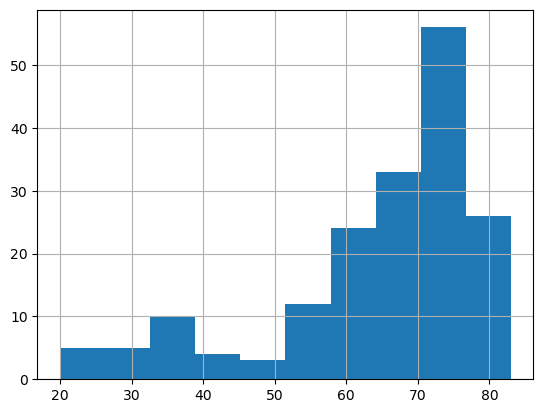

In [102]:
data["GT"].hist()

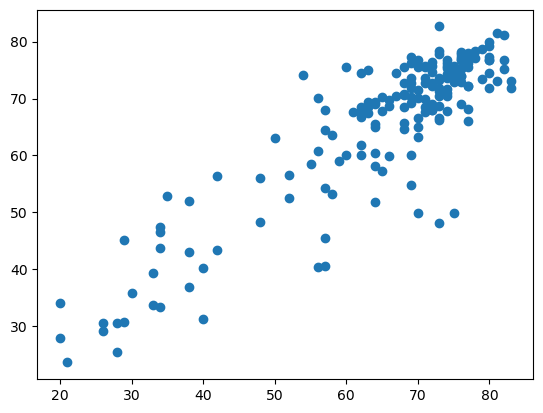

In [101]:
plt.scatter(data['GT'], data["prediction (age)"])

In [4]:
metric_r_squared = r2_score(data["GT"], data["prediction (age)"])
metric_r_squared

0.42363269811419035

In [5]:
metric_mae = mean_absolute_error(data["GT"], data["prediction (age)"])
metric_mae

8.559745699453552

In [79]:
cv_mae_arr = np.load("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_0/MAE.npy")
for i in range(1,9):
    temp = np.load("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_"+str(i)+"/MAE.npy")
    cv_mae_arr = np.column_stack((cv_mae_arr,temp))

In [80]:
cv_mae_arr.shape

(100, 9)

In [81]:
cv_mae_df = pd.DataFrame(cv_mae_arr)
cv_mae_df

,0,1,2,3,4,5,6,7,8
0,54.234215,49.065689,55.983509,54.789303,57.265053,52.870808,58.089943,57.734047,56.783871
1,49.685493,44.577621,50.377602,50.417366,52.535969,48.673061,53.048775,53.421173,51.965286
2,43.518982,38.833199,44.538803,44.195873,46.534664,42.407326,46.772640,47.304138,45.910519
3,37.103161,33.028584,37.539906,37.149467,40.419399,36.181435,39.453587,40.698055,39.106701
4,30.089718,27.516039,30.913643,30.131453,33.881538,28.530130,31.148893,33.847008,32.463528
...,...,...,...,...,...,...,...,...,...
95,7.541165,9.784913,8.438530,7.209020,7.979480,8.276598,6.712065,8.009978,9.949739
96,7.502270,7.794333,6.752485,6.826056,6.840795,7.168546,11.278189,13.706825,5.927011
97,7.142650,10.699566,7.465681,7.686142,7.189470,9.095058,6.802616,6.701515,7.541989
98,9.993590,10.842102,7.150037,9.794067,6.685016,8.798614,13.787000,14.175214,8.872441


In [90]:
df0 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_0/Metrics/epoch_74.csv")
df1 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_1/Metrics/epoch_81.csv")
df2 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_2/Metrics/epoch_99.csv")
df3 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_3/Metrics/epoch_96.csv")
df4 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_4/Metrics/epoch_88.csv")
df5 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_5/Metrics/epoch_86.csv")
df6 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_6/Metrics/epoch_52.csv")
df7 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_7/Metrics/epoch_70.csv")
df8 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_8/Metrics/epoch_96.csv")
df9 = pd.read_csv("/home/ashish/Ashish/UCAN/Results/regression/Experiment_8/CV_8/Metrics/epoch_67.csv")

In [92]:
all_df = pd.concat([df0,df1,df2,df3,df4,df5,df6,df7,df8,df9]).reset_index(drop=True)
all_df.head()


,Unnamed: 0,unique_patient_ID_scan_date,GT,prediction (age)
0,0,lpr385705046400_20140313,33.0,30.427890
1,1,lpr415675513429_20190201,32.0,26.457407
2,2,lpr415675513429_20190320,33.0,49.449950
3,3,lpr884752331885_20181116,69.0,76.535650
4,4,npr100169878450_20130412,68.0,70.640076


In [93]:
metric_mae = mean_absolute_error(all_df["GT"], all_df["prediction (age)"])
metric_mae

8.042625110674157

In [94]:
metric_r_squared = r2_score(all_df["GT"], all_df["prediction (age)"])
metric_r_squared

0.5284573157678183

In [86]:
cv_mae_df_min = []
for i in range(9):
    cv_mae_df_min.append(cv_mae_df[i].min())
    

In [89]:
mean = np.mean(cv_mae_df_min)
mean

6.659415509965685

<Axes: >

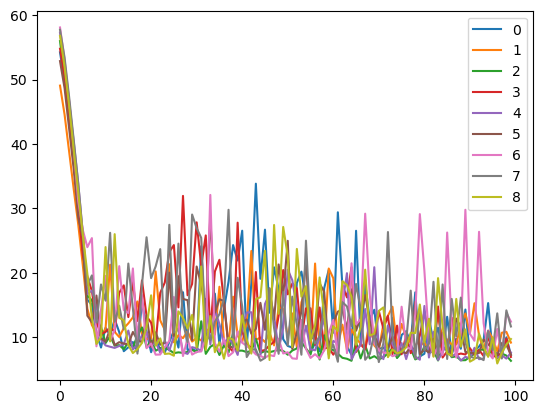

In [82]:
cv_mae_df.plot()

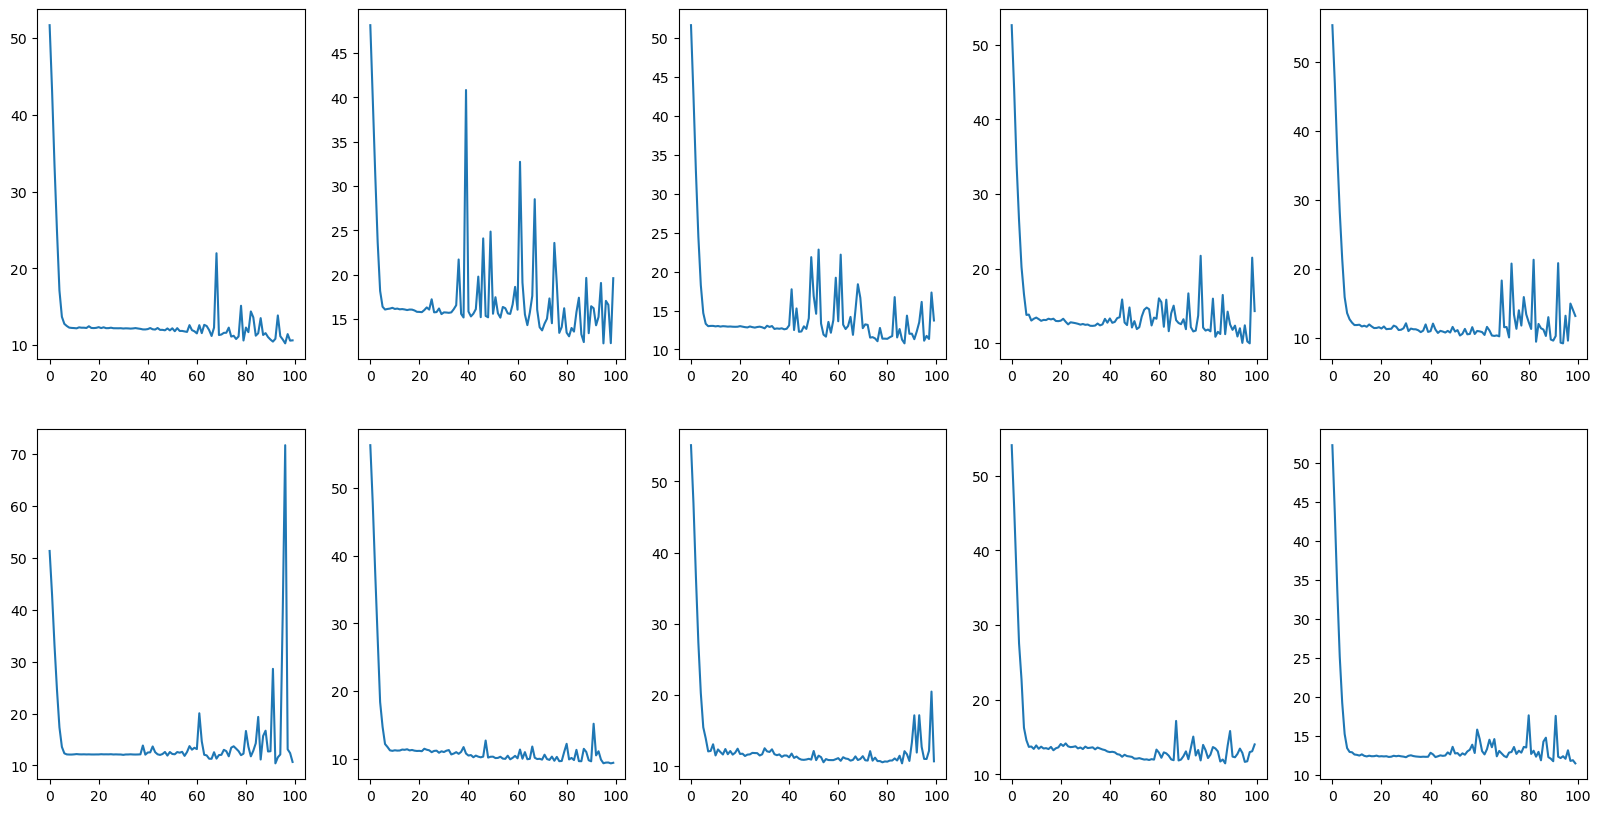

In [28]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(5):
        axs[i, j].plot(range(100), cv_mae_df.loc[:,cv].values)
        cv += 1
plt.show()

In [29]:
df = pd.read_excel("/home/ashish/Ashish/UCAN/dataset_for_training_regression_v2.xlsx")

In [30]:
df.columns

Index(['Unnamed: 0', 'patient_ID', 'scan_date', 'SUV_MIP', 'CT_MIP',
       'SUV_bone', 'CT_bone', 'SUV_lean', 'CT_lean', 'SUV_adipose',
       'CT_adipose', 'SUV_air', 'CT_air', 'patient_age',
       'incorrect_projection'],
      dtype='object')

<Axes: >

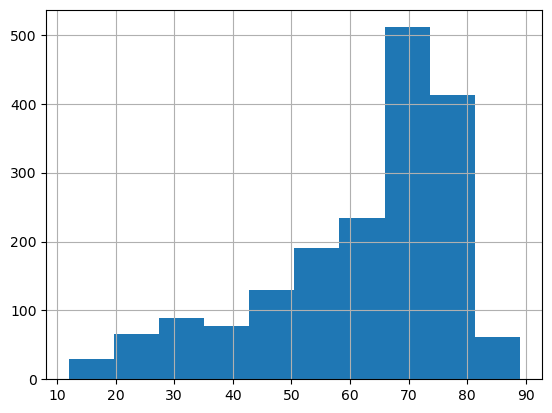

In [31]:
df['patient_age'].hist()

In [30]:

cv_auc_arr = np.load("/home/ashish/Ashish/UCAN/Results/classification/experiment_4/CV_3/AUC.npy")
for i in range(1,4):
    temp = np.load("/home/ashish/Ashish/UCAN/Results/classification/experiment_4/CV_"+str(i)+"/AUC.npy")
    cv_auc_arr = np.column_stack((cv_auc_arr,temp))

In [31]:
cv_auc_arr.shape

(200, 4)

In [32]:
cv_auc_df = pd.DataFrame(cv_auc_arr)
cv_auc_df

,0,1,2,3
0,0.690267,0.706914,0.679692,0.690267
1,0.691467,0.717677,0.675572,0.691467
2,0.666400,0.734041,0.688862,0.666400
3,0.694667,0.735220,0.696305,0.694667
4,0.696933,0.743181,0.694710,0.696933
...,...,...,...,...
195,0.982800,0.992776,0.990696,0.982800
196,0.984667,0.993366,0.988969,0.984667
197,0.985600,0.993808,0.956672,0.985600
198,0.994533,0.987911,0.985513,0.994533


<Axes: >

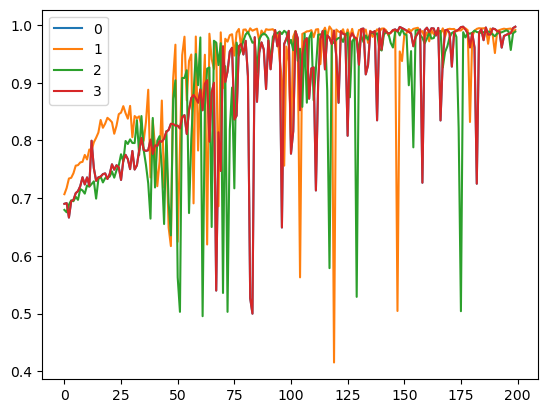

In [33]:
cv_auc_df.plot()

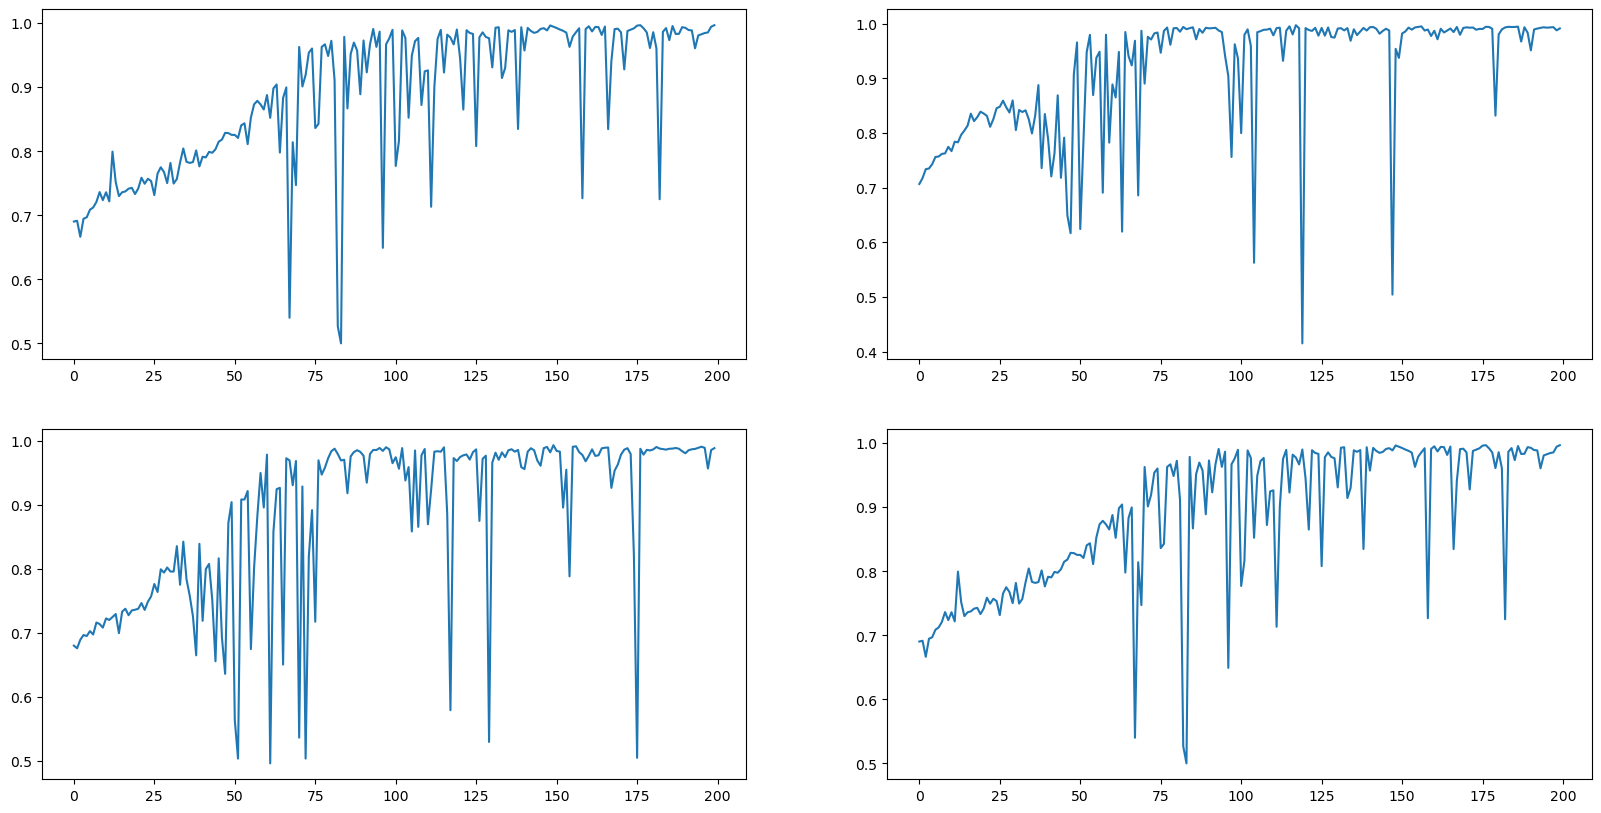

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(2):
        axs[i, j].plot(range(200), cv_auc_df.loc[:,cv].values)
        cv += 1
plt.show()

In [35]:
cv_auc_df.max()

0    0.996933
1    0.997346
2    0.993089
3    0.996933
dtype: float64

### Check reshaped projections

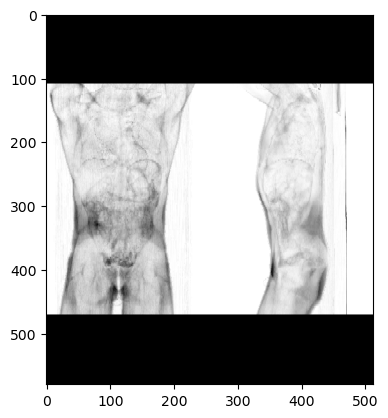

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
image = np.load("/media/andres/T7 Shield1/UCAN_project/collages/reshaped_collages/lpr385705046400/20140313/CT_adipose.npy")
plt.imshow(image, cmap="gray")
plt.show()

In [44]:
path ="/home/ashish/Ashish/UCAN/ReshapedCollages/collages/reshaped_collages/npr100222372477/20171207/"
lst1 = ["SUV_", "CT_"]

lst2 = ["MIP.npy","bone.npy","lean.npy","adipose.npy","air.npy"]

In [45]:
arr1 = np.load(path + "SUV_MIP.npy")
arr2 = np.load(path + "SUV_lean.npy")
arr3 = np.load(path + "CT_MIP.npy")
arr4 = np.load(path + "SUV_adipose.npy")

In [46]:
(arr2==arr4).all()

False

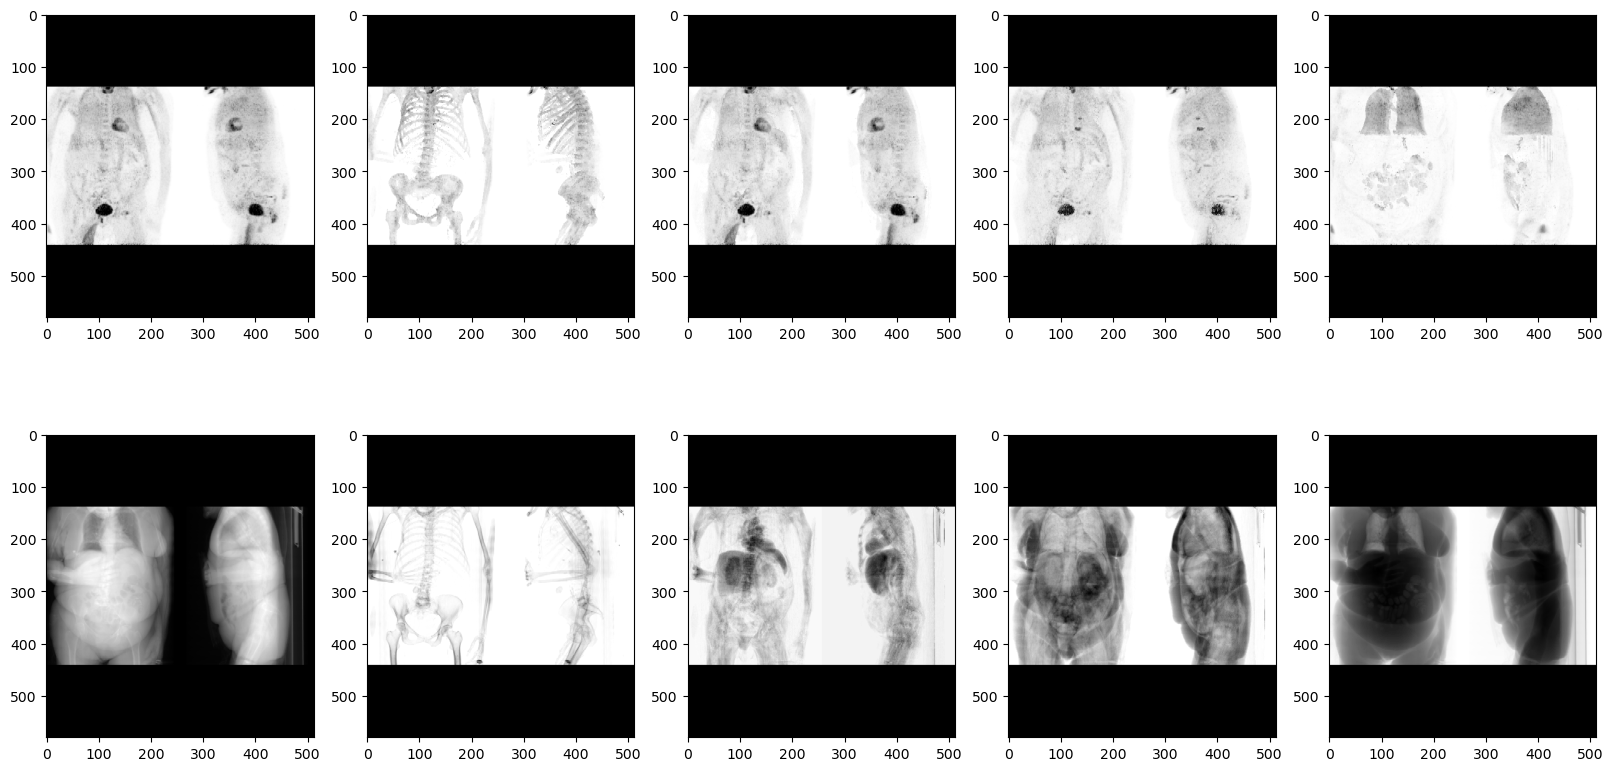

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(5):
        img = np.load(path + lst1[i] + lst2[j])
        axs[i, j].imshow(img,cmap="gray")
        cv += 1
plt.show()

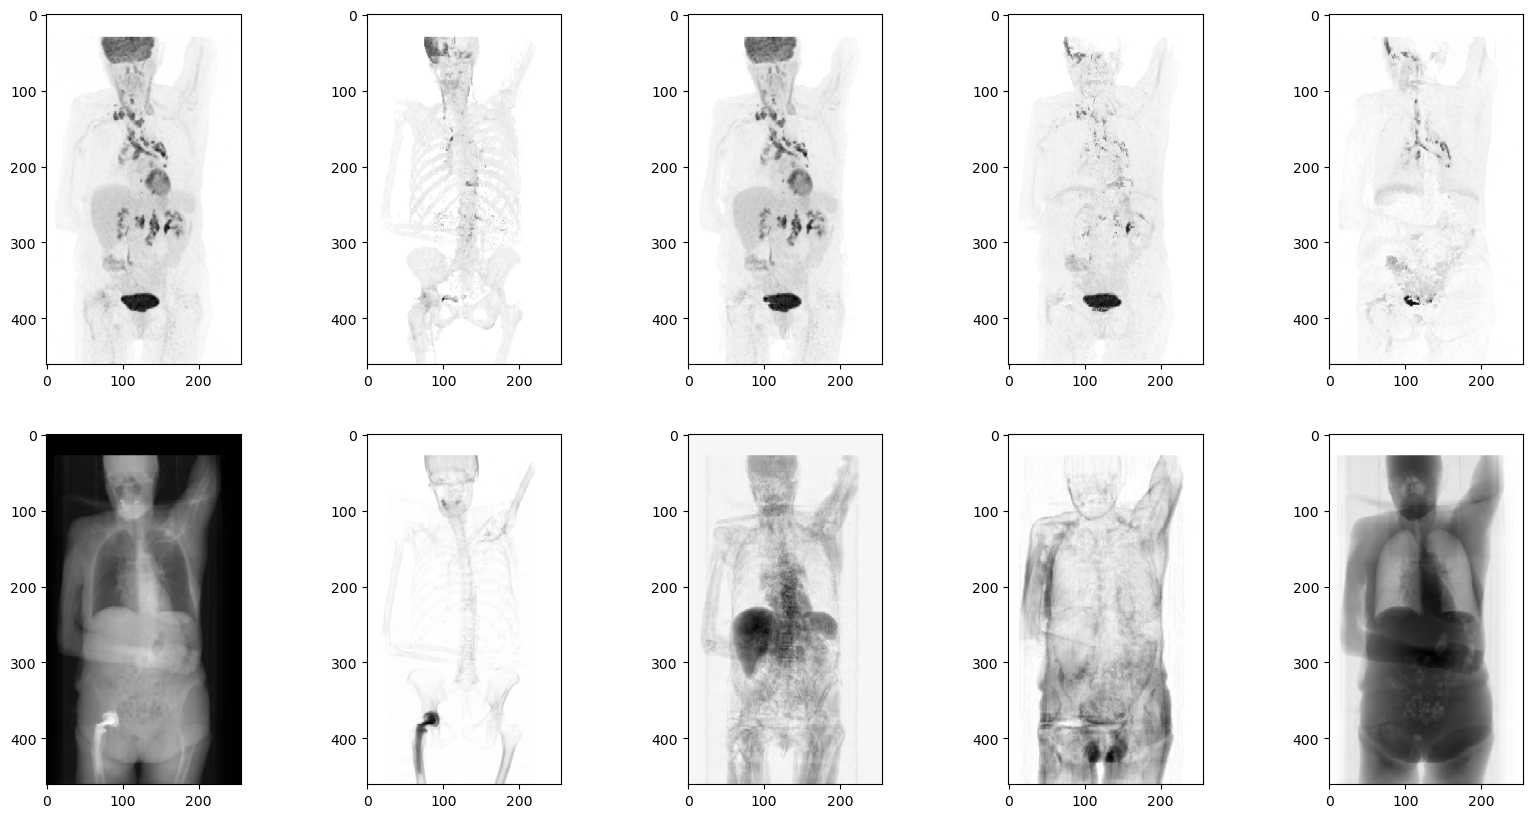

In [33]:
path = "/home/ashish/Ashish/UCAN/ReshapedCollages/raw_projections/npr110222274795/20220512/"

lst1 = ["SUV_", "CT_"]

lst2 = ["MIP","bone","lean","adipose","air"]

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(20,10))

cv=0
for i in range(2):
    for j in range(5):
        img = np.load(path + lst1[i] + lst2[j] + "/-90.0.npy")
        axs[i, j].imshow(img,cmap="gray")
        cv += 1
plt.show()

In [3]:
#df= pd.read_excel("/media/andres/T7 Shield1/UCAN_project/Dataframes/LinkedData/dataset_for_training_366patients_clinical20231129.xlsx")
df = pd.read_excel("/home/ashish/Ashish/UCAN/Dataframes/LinkedData/dataset_for_training_366patients_clinical20231129.xlsx")

In [4]:
df["GT_diagnosis_label"] = np.where(df["diagnosis_groups"]=="C81", 0, np.where(df["diagnosis_groups"]=="C83", 1, 2))
df.columns

Index(['patient_ID', 'dob', 'scan_date', 'consent_date',
       'diff_date (abs(sd-cd))', 'sex', 'age', 'diagnosis_groups', 'diagnosis',
       'SUV_MIP', 'CT_MIP', 'SUV_bone', 'CT_bone', 'SUV_lean', 'CT_lean',
       'SUV_adipose', 'CT_adipose', 'SUV_air', 'CT_air', 'GT_diagnosis_label'],
      dtype='object')

In [5]:
df.diagnosis_groups.value_counts()

diagnosis_groups
C81    300
C83    222
C85     96
C82     51
C84     27
C88     11
C86      8
Name: count, dtype: int64

In [6]:
df.diagnosis_groups.value_counts().sum()

715

In [7]:
df.GT_diagnosis_label.value_counts()/len(df)

GT_diagnosis_label
0    0.41958
1    0.31049
2    0.26993
Name: count, dtype: float64

In [8]:
df.groupby("GT_diagnosis_label").patient_ID

In [9]:
k_fold=10
k=2
factor = round(df.shape[0]/k_fold)


In [10]:
df_sorted = df.sort_values(by="patient_ID")
df_sorted["GT_diagnosis_label"] = np.where(df_sorted["diagnosis_groups"]=="C81", 0, np.where(df_sorted["diagnosis_groups"]=="C83", 1, 2))

#drop extra columns
drop_columns = [col for col in df_sorted.columns if 'Unnamed' in col]
try:
    df_clean = df_sorted.drop(columns=drop_columns).reset_index(drop=True)
except:
    df_clean = df_sorted.copy()

In [11]:
patients_for_val = df_clean[factor*k:].patient_ID.tolist()

In [12]:
df_clean.diagnosis_groups.value_counts()

diagnosis_groups
C81    300
C83    222
C85     96
C82     51
C84     27
C88     11
C86      8
Name: count, dtype: int64

In [13]:
df_clean.diagnosis_groups.value_counts().sum()

715

In [58]:
96+51+27+11+8


193

In [14]:
df_clean[['GT_diagnosis_label', 'patient_ID']].value_counts().to_dict()

{(0, 'npr205346582030'): 17,
 (0, 'npr215862084340'): 14,
 (2, 'npr290047476872'): 9,
 (1, 'npr123895614736'): 8,
 (0, 'npr411641398713'): 7,
 (1, 'npr409055402408'): 7,
 (0, 'npr587748596301'): 7,
 (0, 'npr945780558292'): 7,
 (0, 'npr967652562138'): 6,
 (1, 'npr151953219609'): 6,
 (2, 'npr464385153056'): 5,
 (2, 'npr470970231103'): 5,
 (2, 'npr808001897300'): 4,
 (0, 'npr391996850427'): 4,
 (1, 'npr203979873997'): 4,
 (0, 'npr440182893392'): 4,
 (0, 'npr884176295970'): 4,
 (0, 'npr876364215211'): 4,
 (0, 'npr963059006542'): 4,
 (1, 'npr433420741300'): 4,
 (1, 'npr466311402891'): 4,
 (1, 'npr262040159778'): 4,
 (1, 'npr123612599830'): 4,
 (0, 'npr523203111112'): 4,
 (0, 'npr278680122806'): 4,
 (2, 'npr216618605686'): 4,
 (0, 'npr275493924649'): 4,
 (0, 'npr266866502849'): 4,
 (2, 'npr272488756772'): 4,
 (1, 'npr618333632547'): 4,
 (1, 'npr589835240199'): 4,
 (2, 'npr341547460859'): 4,
 (0, 'npr778143088137'): 3,
 (0, 'npr669539614610'): 3,
 (0, 'npr689214355331'): 3,
 (0, 'npr692304145

In [15]:
df_clean[ df_clean['patient_ID'] == 'npr205346582030' ]

,patient_ID,dob,scan_date,consent_date,diff_date (abs(sd-cd)),sex,age,diagnosis_groups,diagnosis,SUV_MIP,CT_MIP,SUV_bone,CT_bone,SUV_lean,CT_lean,SUV_adipose,CT_adipose,SUV_air,CT_air,GT_diagnosis_label
78,npr205346582030,1968-09-15,2018-01-08,2015-01-14,1090.0,MALE,49,C81,C81.1 - Hodgkins lymfom (klassiskt) med nodulä...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,0
79,npr205346582030,1968-09-15,2017-04-24,2015-01-14,831.0,MALE,48,C81,C81.1 - Hodgkins lymfom (klassiskt) med nodulä...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,0
80,npr205346582030,1968-09-15,2018-04-24,2015-01-14,1196.0,MALE,49,C81,C81.1 - Hodgkins lymfom (klassiskt) med nodulä...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,0
81,npr205346582030,1968-09-15,2016-08-24,2015-01-14,588.0,MALE,47,C81,C81.1 - Hodgkins lymfom (klassiskt) med nodulä...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,0
82,npr205346582030,1968-09-15,2018-08-10,2015-01-14,1304.0,MALE,49,C81,C81.1 - Hodgkins lymfom (klassiskt) med nodulä...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,0
83,npr205346582030,1968-09-15,2019-01-11,2015-01-14,1458.0,MALE,50,C81,C81.1 - Hodgkins lymfom (klassiskt) med nodulä...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,/home/ashish/Ashish/UCAN/ReshapedCollages/coll...,0
84,npr205346582030,1968-09-15,2018-06-13,2015-01-14,1246.0,MA

In [53]:
df_clean[0:12].patient_ID

0     lpr385705046400
1     lpr415675513429
2     lpr415675513429
3     npr100169878450
4     npr100169878450
5     npr106484754818
6     npr107605794128
7     npr107605794128
8     npr113096472044
9     npr113096472044
10    npr113096472044
11    npr116141176598
Name: patient_ID, dtype: object

In [ ]:
df_clean

In [17]:
df1= df_clean[df_clean['GT_diagnosis_label']==0].reset_index(drop=True)
df1.patient_ID.reset_index(drop=True)

0      lpr385705046400
1      lpr415675513429
2      lpr415675513429
3      npr100169878450
4      npr100169878450
            ...       
295    npr977126064543
296    npr977126064543
297    npr982351971319
298    npr997877056847
299    npr997877056847
Name: patient_ID, Length: 300, dtype: object

In [18]:
df2= df_clean[df_clean['GT_diagnosis_label']==1].reset_index(drop=True)
df2.patient_ID.reset_index(drop=True)

0      npr107605794128
1      npr107605794128
2      npr119028214824
3      npr123612599830
4      npr123612599830
            ...       
217    npr969809218833
218    npr978627791454
219    npr986278795329
220    npr987467931634
221    npr995000010364
Name: patient_ID, Length: 222, dtype: object

In [19]:
df3= df_clean[df_clean['GT_diagnosis_label']==2].reset_index(drop=True)
df3.patient_ID.reset_index(drop=True)

0      npr106484754818
1      npr116141176598
2      npr130508688944
3      npr130508688944
4      npr130508688944
            ...       
188    npr961455973640
189    npr971885828856
190    npr982307732936
191    npr988275348495
192    npr999062108241
Name: patient_ID, Length: 193, dtype: object

In [17]:
df_clean.GT_diagnosis_label.value_counts().sum()

715

In [17]:
k_fold=10
df_list=[ df_clean[df_clean['GT_diagnosis_label']==x].reset_index(drop=True) for x in range(3) ]
factor_list= [round(x.shape[0]/k_fold) for x in df_list]
sum = 0
for k in range(10):

    if k == (k_fold - 1):
        patients_for_val = []
        for x,f in zip(df_list,factor_list):
            patients_for_val.extend(x[f*k:].patient_ID.tolist())
        df_val = df_clean[df_clean.patient_ID.isin(patients_for_val)].reset_index(drop=True)

    else:
        patients_for_val = []
        for x,f in zip(df_list,factor_list):
            patients_for_val.extend(x[f*k:f*k+f].patient_ID.tolist())
        df_val = df_clean[df_clean.patient_ID.isin(patients_for_val)].reset_index(drop=True)

    df_train = df_clean[~df_clean.patient_ID.isin(patients_for_val)].reset_index(drop=True)

    sum+=df_val.shape[0]
    print(df_train.shape, (df_train.GT_diagnosis_label.value_counts()/len(df_train)).to_list(), end=' ')
    print(df_val.shape, (df_val.GT_diagnosis_label.value_counts()/len(df_val)).to_list(), end=' ')
    print(df_train.shape[0]+df_val.shape[0], end=' ')
    print('\n')
print(sum)

(640, 20) [0.415625, 0.3125, 0.271875] (75, 20) [0.4533333333333333, 0.29333333333333333, 0.25333333333333335] 715 

(630, 20) [0.40793650793650793, 0.31587301587301586, 0.2761904761904762] (85, 20) [0.5058823529411764, 0.27058823529411763, 0.2235294117647059] 715 

(640, 20) [0.421875, 0.30625, 0.271875] (75, 20) [0.4, 0.3466666666666667, 0.25333333333333335] 715 

(641, 20) [0.41965678627145087, 0.3088923556942278, 0.2714508580343214] (74, 20) [0.4189189189189189, 0.32432432432432434, 0.25675675675675674] 715 

(635, 20) [0.415748031496063, 0.31181102362204727, 0.27244094488188975] (80, 20) [0.45, 0.3, 0.25] 715 

(637, 20) [0.423861852433281, 0.3108320251177394, 0.2653061224489796] (78, 20) [0.38461538461538464, 0.3076923076923077, 0.3076923076923077] 715 

(641, 20) [0.41965678627145087, 0.31201248049922, 0.26833073322932915] (74, 20) [0.4189189189189189, 0.2972972972972973, 0.28378378378378377] 715 

(640, 20) [0.4171875, 0.3125, 0.2703125] (75, 20) [0.44, 0.29333333333333333, 0.2

In [18]:
suvmip = np.load('/home/ashish/Ashish/UCAN/collages/reshaped_collages/npr100222372477/20171207/SUV_MIP.npy')

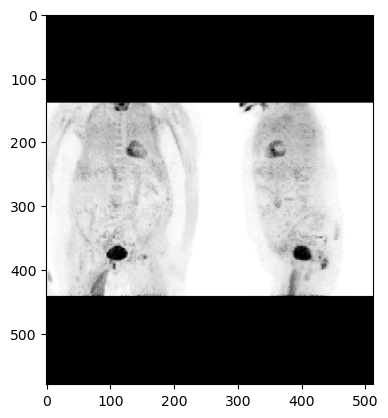

In [21]:
plt.imshow(suvmip, cmap='gray')